# Handwritten Digit Recognition :

## Libraries used :
tensorflow: TensorFlow is an open-source machine learning library developed by Google. It provides a comprehensive set of tools for building and training machine learning models.

keras: Keras is a high-level API for building and training deep learning models. It is built on top of TensorFlow and provides a simpler, more intuitive interface for building models.

numpy: NumPy is a Python library for numerical computing. It provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions for working with these arrays.

matplotlib: Matplotlib is a data visualization library for Python. It provides tools for creating a wide range of plots and charts, including line plots, scatter plots, bar plots, and more.

mnist: The MNIST dataset is a collection of handwritten digits that is often used as a benchmark dataset for image classification tasks. It is provided as part of the TensorFlow library and can be easily loaded using the mnist.load_data() function.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Load the MNIST dataset
We then load the MNIST dataset, which is split into training and test sets. 
The load_data() function returns the dataset split into training and test data and labels

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # Load MNIST dataset into training and test sets

## Normalize the input data:

We normalize the input data by dividing each pixel value by 255.0, so that all pixel values are between 0 and 1.

In [3]:
x_train = x_train / 255.0                                               # Normalize training set by dividing each pixel value by 255
x_test = x_test / 255.0                                                 # Normalize test set by dividing each pixel value by 255

## Building the model architecture:

We define a simple neural network with one hidden layer, which takes the flattened input images (28x28 pixels) as input and outputs a probability distribution over the 10 possible classes (0 to 9). 
The Sequential model is used, which is a linear stack of layers. We define the model architecture using the Dense layer, which is a fully connected layer.

In [4]:
model = keras.models.Sequential([                               # Define a sequential model object
    keras.layers.Flatten(input_shape=(28, 28)),              # Flatten the input images into 1D array
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

## Compile the model:

We compile the model with the Adam optimizer, which is an adaptive learning rate optimization algorithm. The loss function used is sparse_categorical_crossentropy, which is used when the labels are integers. We also specify the metric to evaluate the model's performance.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model:

We train the model on the training data for 10 epochs using the fit() function.

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2979 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1432 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1095 - accuracy: 0.9663
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0886 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0777 - accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0657 - accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0577 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0486 - accuracy: 0.9842
Epoch 10/10
1875/1875 [==============================] - 24s 13m

## Evaluate the model on test data:

We evaluate the model's performance on the test data using the evaluate() function, which returns the loss and accuracy of the model on the test data.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0717 - accuracy: 0.9776 - 2s/epoch - 6ms/step

Test accuracy: 0.9775999784469604


## Make predictions on new data:

We make predictions on the first 5 test images using the predict() function, which returns the probability distribution over the 10 possible classes.

In [8]:
predictions = model.predict(x_test[:8])

1/1 [==============================] - 0s 129ms/step


## Print the predictions along with the images:

We iterate over the first 5 test images, plot them using imshow, and display their predicted labels using xlabel. The color of the label is green if the prediction is correct and red if it's incorrect. Finally, we use show to display the plot.

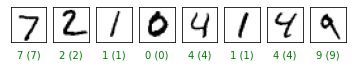

In [9]:
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()